<a href="https://colab.research.google.com/github/SJhawar1010/AI-in-Cyber-Security/blob/main/2348554_AIinCS_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/AI in Cyber Security/MalwareArtifacts.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137444 entries, 0 to 137443
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   AddressOfEntryPoint          137444 non-null  int64
 1   MajorLinkerVersion           137444 non-null  int64
 2   MajorImageVersion            137444 non-null  int64
 3   MajorOperatingSystemVersion  137444 non-null  int64
 4   DllCharacteristics           137444 non-null  int64
 5   SizeOfStackReserve           137444 non-null  int64
 6   NumberOfSections             137444 non-null  int64
 7   ResourceSize                 137444 non-null  int64
 8   legitimate                   137444 non-null  int64
dtypes: int64(9)
memory usage: 9.4 MB


In [6]:
df.describe()

,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
count,1.374440e+05,137444.000000,137444.000000,137444.000000,137444.000000,1.374440e+05,137444.000000,1.374440e+05,137444.000000
mean,1.722186e+05,8.620784,68.731876,5.098738,22301.043436,9.306841e+05,4.997119,2.474766e+05,0.297707
std,3.438014e+06,4.095635,1185.709873,99.437584,15444.753219,5.553175e+05,1.917237,2.129516e+07,0.457252
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,1.272100e+04,8.000000,0.000000,4.000000,320.000000,1.048576e+06,4.000000,2.216000e+03,0.000000
50%,5.300800e+04,9.000000,0.000000,5.000000,33088.000000,1.048576e+06,5.000000,9.640000e+03,0.000000
75%,6.157800e+04,10.000000,6.000000,5.000000,33088.000000,1.048576e+06,5.000000,2.376250e+04,1.000000
max,1.074484e+09,255.000000,28619.000000,36868.000000,49504.000000,3.355443e+07,40.000000,4.294903e+09,1.000000


In [7]:
df.shape

(137444, 9)

In [8]:
df.head()

,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
0,10407,9,6,6,33088,262144,4,952,1
1,5354,9,6,6,33088,262144,4,952,1
2,58807,9,6,6,33088,262144,4,136490,1
3,25166,9,6,6,33088,262144,4,1940,1
4,70387,9,6,6,33088,262144,4,83098,1


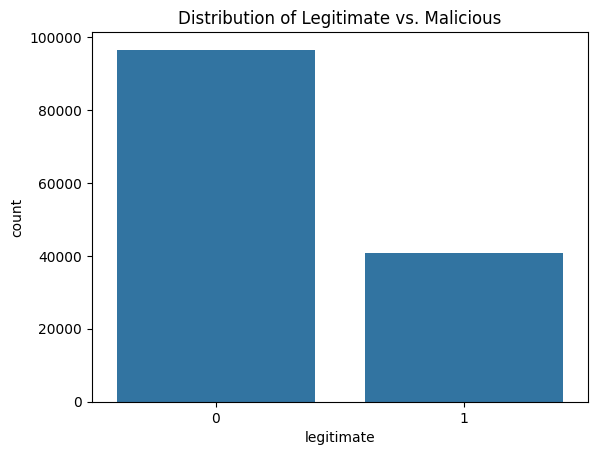

In [9]:
sns.countplot(x='legitimate', data=df)
plt.title('Distribution of Legitimate vs. Malicious')
plt.show()

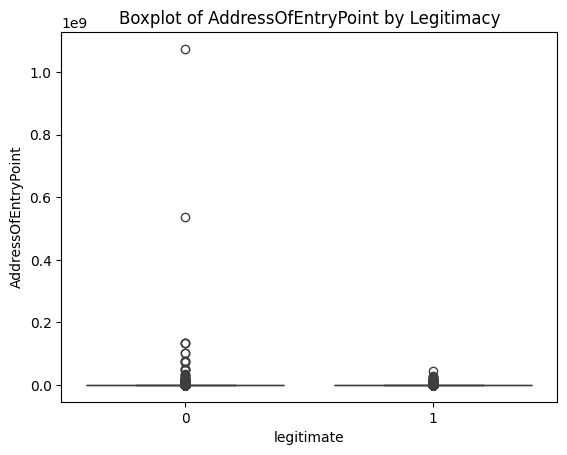

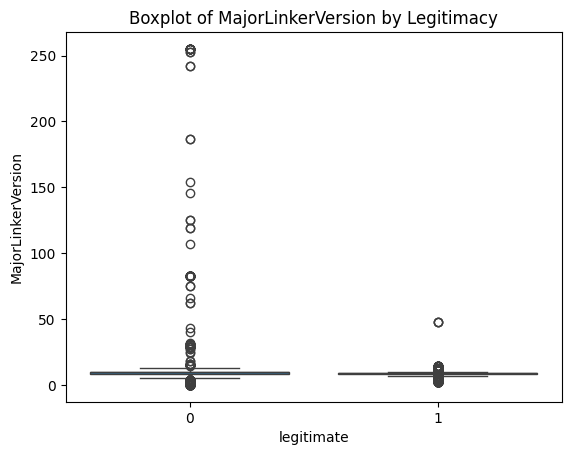

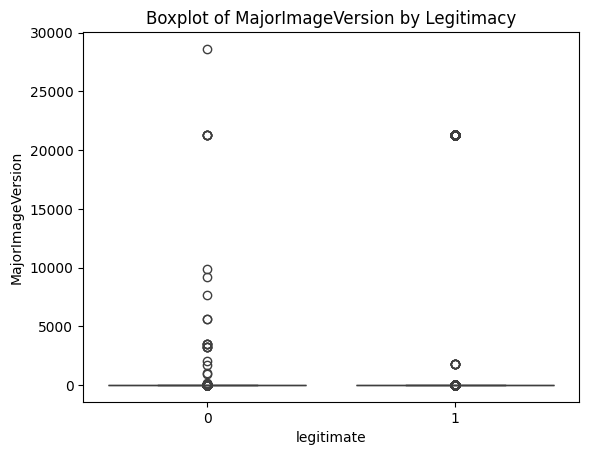

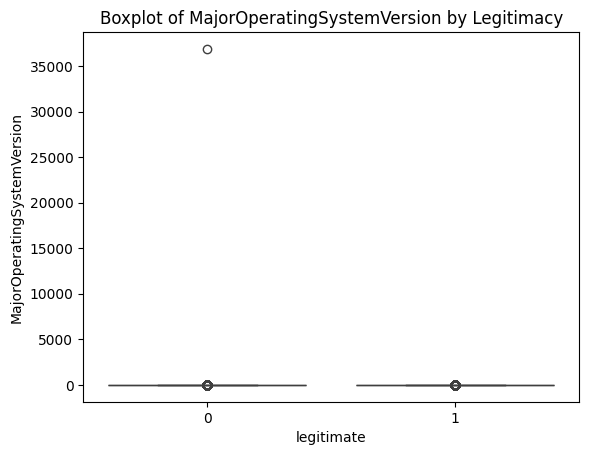

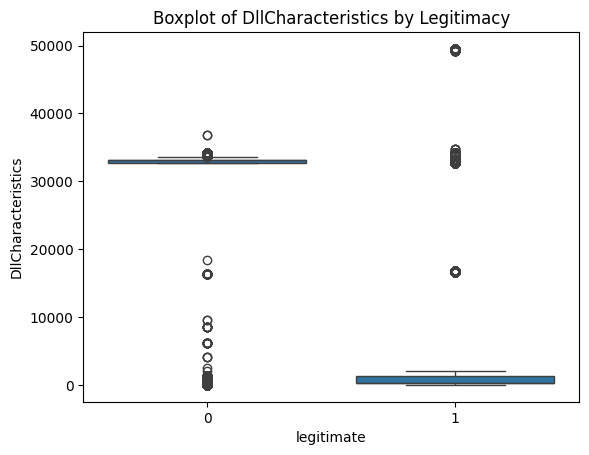

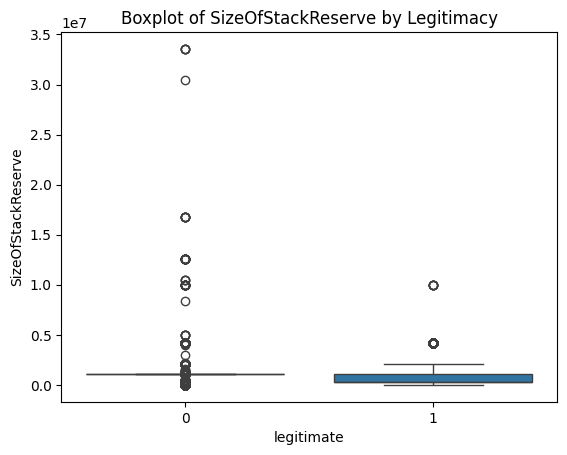

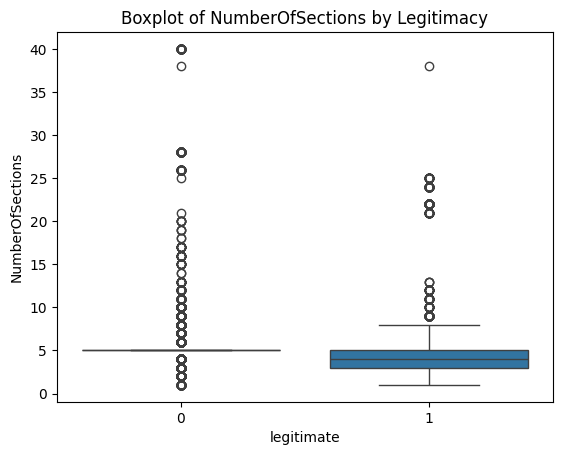

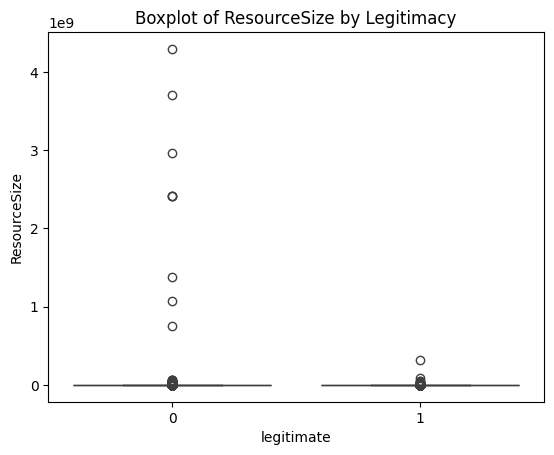

In [10]:
for column in df.columns[:-1]:
    sns.boxplot(x='legitimate', y=column, data=df)
    plt.title(f'Boxplot of {column} by Legitimacy')
    plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_text

In [31]:
X = df.drop('legitimate', axis=1)
y = df['legitimate']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
dt_model = DecisionTreeClassifier(random_state=42)

In [34]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
y_pred_dt = dt_model.predict(X_test)

In [36]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

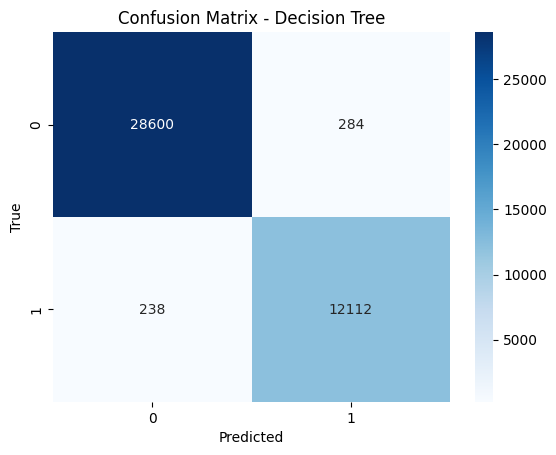

In [37]:
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [38]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     28884
           1       0.98      0.98      0.98     12350

    accuracy                           0.99     41234
   macro avg       0.98      0.99      0.98     41234
weighted avg       0.99      0.99      0.99     41234



In [39]:
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- SizeOfStackReserve <= 991520.00
|   |--- MajorOperatingSystemVersion <= 4.50
|   |   |--- SizeOfStackReserve <= 196608.00
|   |   |   |--- ResourceSize <= 740.00
|   |   |   |   |--- ResourceSize <= 450.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ResourceSize >  450.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- ResourceSize >  740.00
|   |   |   |   |--- AddressOfEntryPoint <= 7046.00
|   |   |   |   |   |--- AddressOfEntryPoint <= 5450.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- AddressOfEntryPoint >  5450.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- AddressOfEntryPoint >  7046.00
|   |   |   |   |   |--- class: 0
|   |   |--- SizeOfStackReserve >  196608.00
|   |   |   |--- ResourceSize <= 884.00
|   |   |   |   |--- class: 0
|   |   |   |--- ResourceSize >  884.00
|   |   |   |   |--- MajorLinkerVersion <= 4.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- MajorLinkerVersion >  4.00
|   |

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
X = df.drop('legitimate', axis=1)
y = df['legitimate']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
y_pred_rf = rf_model.predict(X_test)

In [45]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

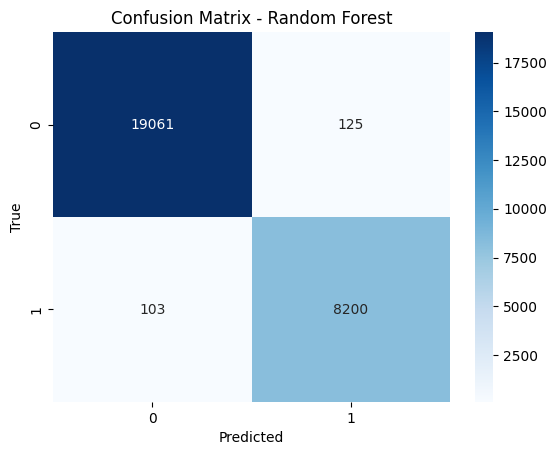

In [46]:
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [48]:
one_tree = rf_model.estimators_[0]
tree_rules_rf = export_text(one_tree, feature_names=list(X.columns))
print("One Decision Tree in Random Forest:")
print(tree_rules_rf)

One Decision Tree in Random Forest:
|--- SizeOfStackReserve <= 991520.00
|   |--- MajorImageVersion <= 0.50
|   |   |--- MajorOperatingSystemVersion <= 4.50
|   |   |   |--- SizeOfStackReserve <= 196608.00
|   |   |   |   |--- NumberOfSections <= 7.50
|   |   |   |   |   |--- AddressOfEntryPoint <= 121752.00
|   |   |   |   |   |   |--- NumberOfSections <= 4.50
|   |   |   |   |   |   |   |--- MajorLinkerVersion <= 3.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- MajorLinkerVersion >  3.50
|   |   |   |   |   |   |   |   |--- ResourceSize <= 5216.00
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- ResourceSize >  5216.00
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- NumberOfSections >  4.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- AddressOfEntryPoint >  121752.00
|   |   |   |   |   |   |--- AddressOfEntryPoint <= 132308.50
|   |   |   |   |   |   

In [ ]:
xx